<div class="alert alert-block alert-danger">
    
### Notes 

</div>

### Categorical data, Multicollinearity, Numerical python, $\dots$

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from scipy import stats

import statsmodels.api as sm
import statsmodels.formula.api as smf

from pandas.plotting import scatter_matrix

In [3]:
plt.close('all')

np.random.seed(1234)

In [4]:
data=pd.read_csv('bism.txt', sep='\t')
data.head()

,Wgt,Gest,Smoke
0,2940,38,yes
1,3130,38,no
2,2420,36,yes
3,2450,34,no
4,2760,39,yes


In [5]:
data['SmokeBinaried']=data['Smoke'].apply(lambda x: 0 if x=='yes' else 1)
data.head()

,Wgt,Gest,Smoke,SmokeBinaried
0,2940,38,yes,0
1,3130,38,no,1
2,2420,36,yes,0
3,2450,34,no,1
4,2760,39,yes,0


In [6]:
m=smf.ols('Wgt ~ Gest + SmokeBinaried', data=data).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Wgt   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     125.4
Date:                Sun, 15 Mar 2020   Prob (F-statistic):           5.29e-15
Time:                        01:19:03   Log-Likelihood:                -195.82
No. Observations:                  32   AIC:                             397.6
Df Residuals:                      29   BIC:                             402.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2634.1170    358.872     -7.340      0.000   -3368.093   -1900.141
Gest            143.1003      9.128     15.677      0.000     124.431     161.769
SmokeBinaried   244.5440     41.982      5.825      0.000     158.682     330.406
==============================================================================
Omnibus:                        1.946   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.378   Jarque-Bera (JB):                1.162
Skew:                          -0.090   Prob(JB):                        0.559
Kurtosis:                       2.084   Cond. No.                         681.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

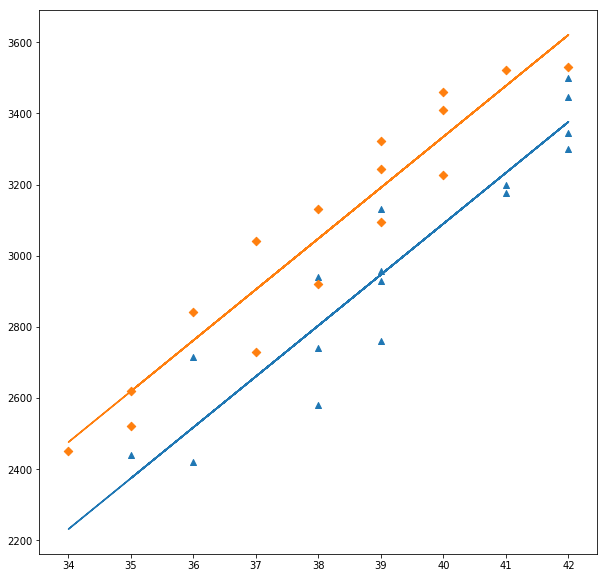

In [7]:
plt.figure(figsize=(10,10))
plt.scatter(data['Gest'].where(data['SmokeBinaried']==0), data['Wgt'], marker='^')
plt.scatter(data['Gest'].where(data['SmokeBinaried']==1), data['Wgt'], marker='D')
plt.plot(data['Gest'], m.params[0] + m.params[1]*data['Gest'] + m.params[2]*0);
plt.plot(data['Gest'], m.params[0] + m.params[1]*data['Gest'] + m.params[2]*1);

***

##### $K-1$ indicative variables from $K$ categorical levels to avoid issues with strong multicollinearity.

***

In [8]:
X = pd.get_dummies(data['Smoke'], prefix='Smoker')

data.drop('SmokeBinaried', axis=1, inplace=True)
data_encoded = pd.concat([data, X], axis=1)
data_encoded.head()

,Wgt,Gest,Smoke,Smoker_no,Smoker_yes
0,2940,38,yes,0,1
1,3130,38,no,1,0
2,2420,36,yes,0,1
3,2450,34,no,1,0
4,2760,39,yes,0,1


In [9]:
warnings_model = smf.ols('Wgt ~ Gest + Smoker_no + Smoker_yes', data=data_encoded).fit()
warnings_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Wgt   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     125.4
Date:                Sun, 15 Mar 2020   Prob (F-statistic):           5.29e-15
Time:                        01:19:03   Log-Likelihood:                -195.82
No. Observations:                  32   AIC:                             397.6
Df Residuals:                      29   BIC:                             402.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1674.5633    235.633     -7.107      0.000   -2156.487   -1192.640
Gest         143.1003      9.128     15.677      0.000     124.431     161.769
Smoker_no   -715.0096    114.807     -6.228      0.000    -949.816    -480.203
Smoker_yes  -959.5537    124.347     -7.717      0.000   -1213.871    -705.236
==============================================================================
Omnibus:                        1.946   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.378   Jarque-Bera (JB):                1.162
Skew:                          -0.090   Prob(JB):                        0.559
Kurtosis:                       2.084   Cond. No.                     2.10e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.09e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [10]:
data_encoded.corr()

,Wgt,Gest,Smoker_no,Smoker_yes
Wgt,1.000000,0.880432,0.135362,-0.135362
Gest,0.880432,1.000000,-0.231020,0.231020
Smoker_no,0.135362,-0.231020,1.000000,-1.000000
Smoker_yes,-0.135362,0.231020,-1.000000,1.000000


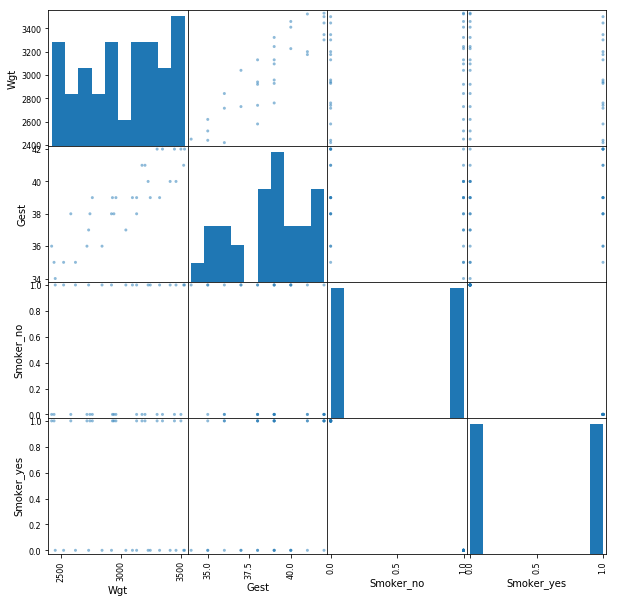

In [11]:
scatter_matrix(data_encoded, figsize=(10,10));

***

In [12]:
X=pd.get_dummies(data['Smoke'], drop_first=True, prefix='Smoker')

data_encoded = pd.concat([data, X], axis=1)
data_encoded.head()

,Wgt,Gest,Smoke,Smoker_yes
0,2940,38,yes,1
1,3130,38,no,0
2,2420,36,yes,1
3,2450,34,no,0
4,2760,39,yes,1


In [13]:
m2=smf.ols('Wgt ~ Gest + Smoker_yes', data=data_encoded).fit()
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Wgt   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     125.4
Date:                Sun, 15 Mar 2020   Prob (F-statistic):           5.29e-15
Time:                        01:19:05   Log-Likelihood:                -195.82
No. Observations:                  32   AIC:                             397.6
Df Residuals:                      29   BIC:                             402.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2389.5729    349.206     -6.843      0.000   -3103.779   -1675.366
Gest         143.1003      9.128     15.677      0.000     124.431     161.769
Smoker_yes  -244.5440     41.982     -5.825      0.000    -330.406    -158.682
==============================================================================
Omnibus:                        1.946   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.378   Jarque-Bera (JB):                1.162
Skew:                          -0.090   Prob(JB):                        0.559
Kurtosis:                       2.084   Cond. No.                         663.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""